# Number Plate detection and recoginition

**Code For Training**

In [ ]:
!nvidia-smi

Sat May  3 09:14:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/yolo
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

!pip install -q roboflow

!pip install torch==2.5.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install "Pillow<10.0"



Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 5.36 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/drive/MyDrive/yolo/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 

In [ ]:
HOME = "/content/drive/MyDrive/yolo"
%cd /content/drive/MyDrive/yolo
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

/content/drive/MyDrive/yolo


In [ ]:
!ls -la {HOME}/weights

total 402426
-rw------- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw------- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw------- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw------- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
%cd {HOME}/yolov9

/content/drive/MyDrive/yolo/yolov9


In [ ]:
HOME = "/content/drive/MyDrive/yolo"
%cd /content/drive/MyDrive/yolo/yolov9

import roboflow
roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("arvind-kumar-wjygd").project("anpr2-syxl7")
version = project.version(8)
dataset = version.download("yolov9")

/content/drive/MyDrive/yolo/yolov9
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!python train.py \
--batch 16 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2025-05-03 09:39:46.959748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746265186.979906   15660 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746265186.986075   15660 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-03 09:39:47.011247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb:

In [ ]:
!ls {HOME}/yolov9/runs/train/exp4/

confusion_matrix.png				     opt.yaml	   train_batch0.jpg
events.out.tfevents.1746265216.dc16f75ecd03.15660.0  P_curve.png   train_batch1.jpg
F1_curve.png					     PR_curve.png  train_batch2.jpg
hyp.yaml					     R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				     results.csv   val_batch0_pred.jpg
labels.jpg					     results.png   weights


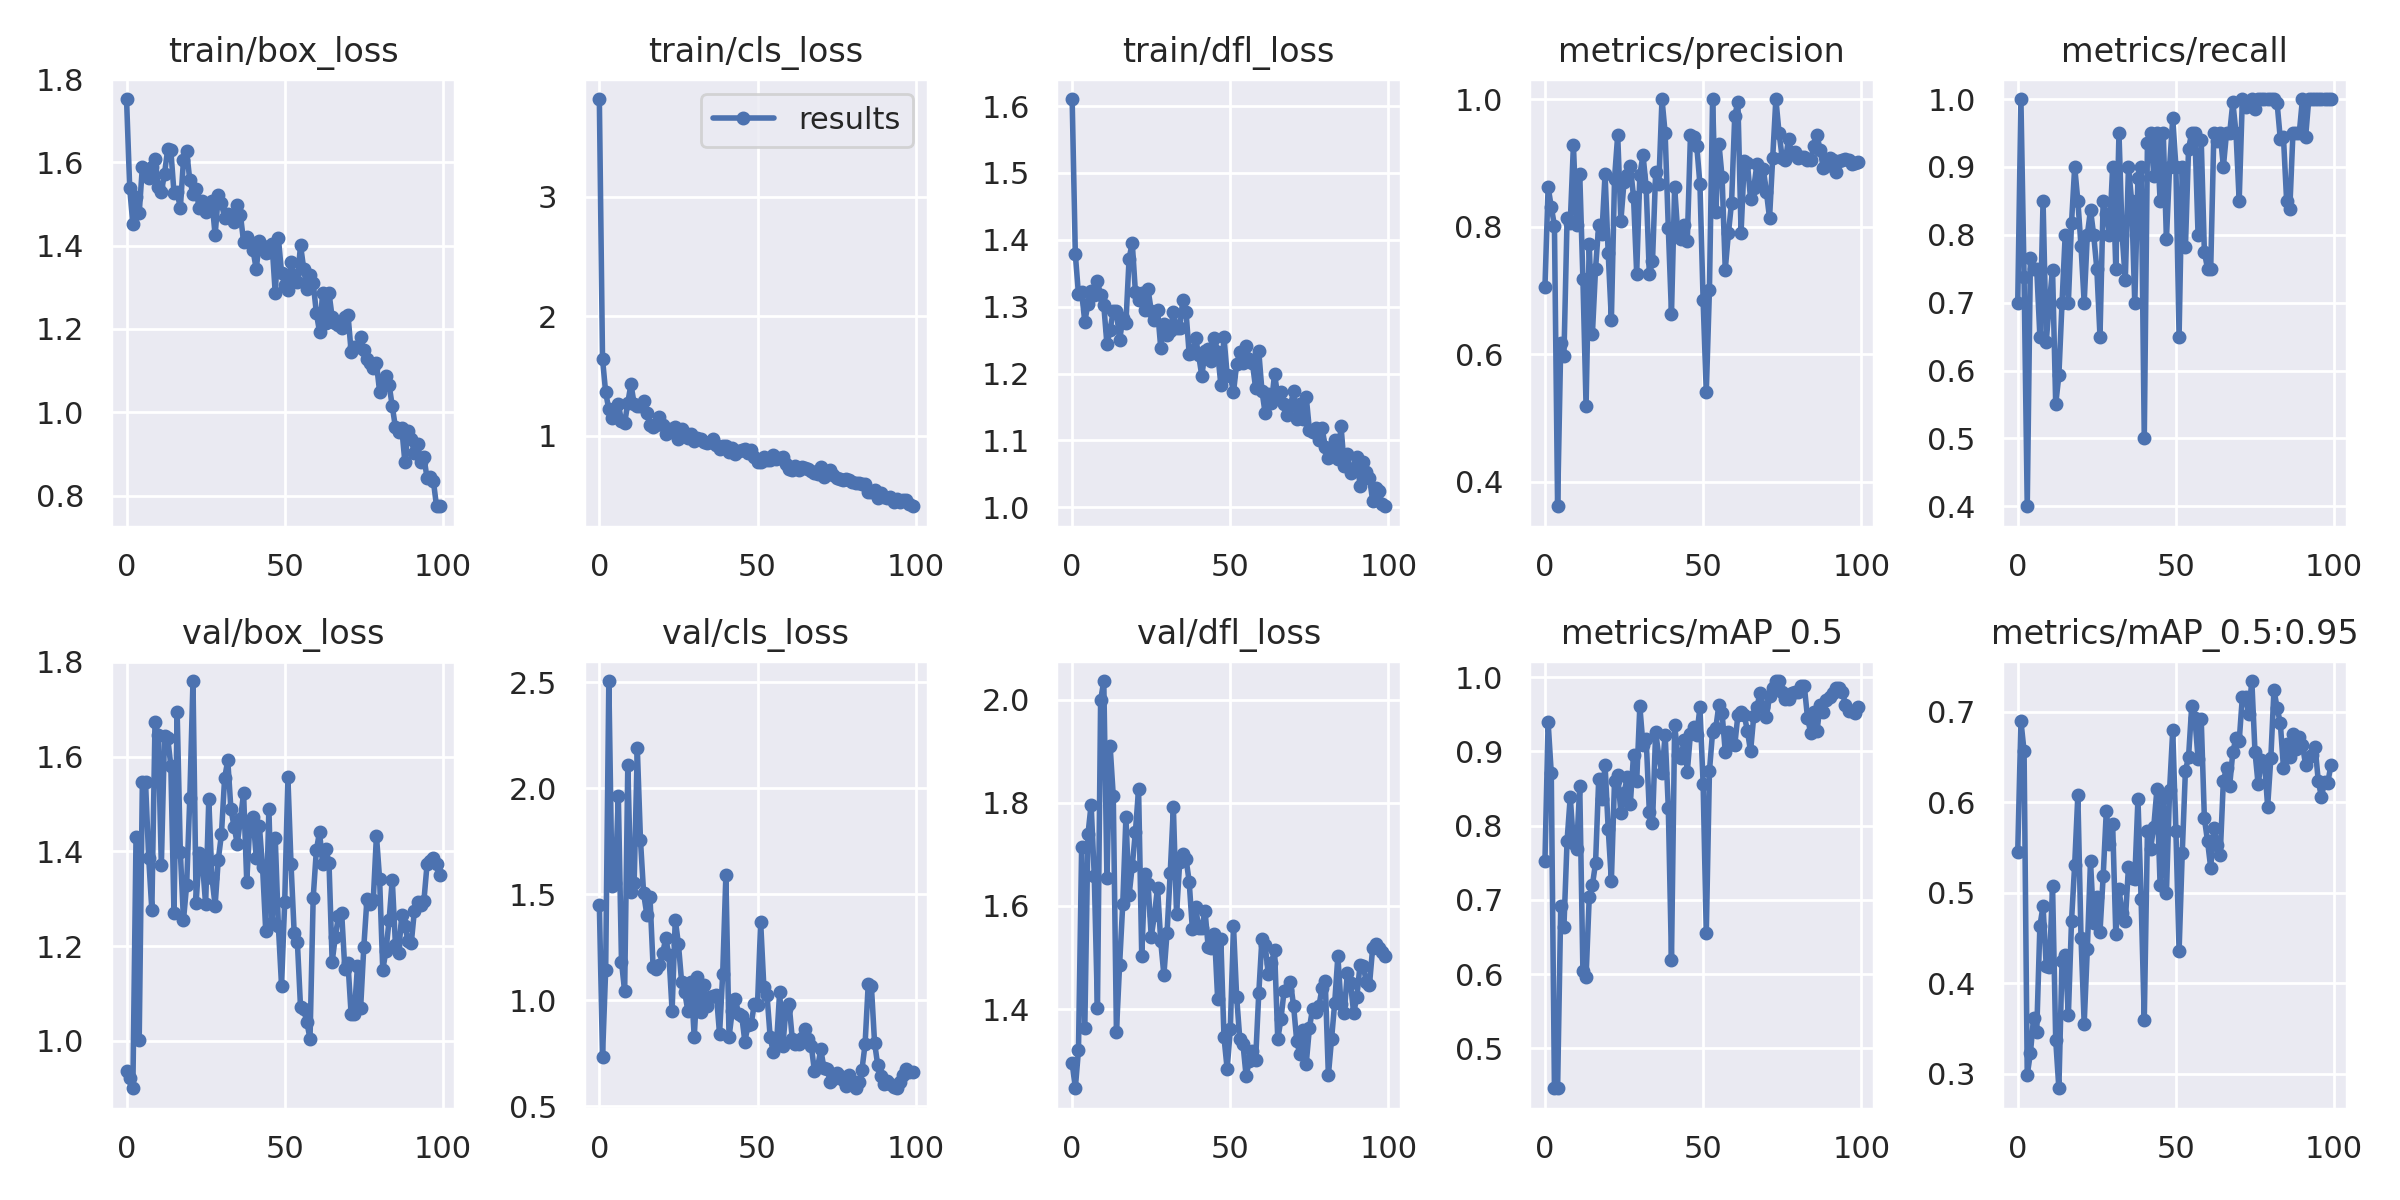

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp4/results.png", width=1000)

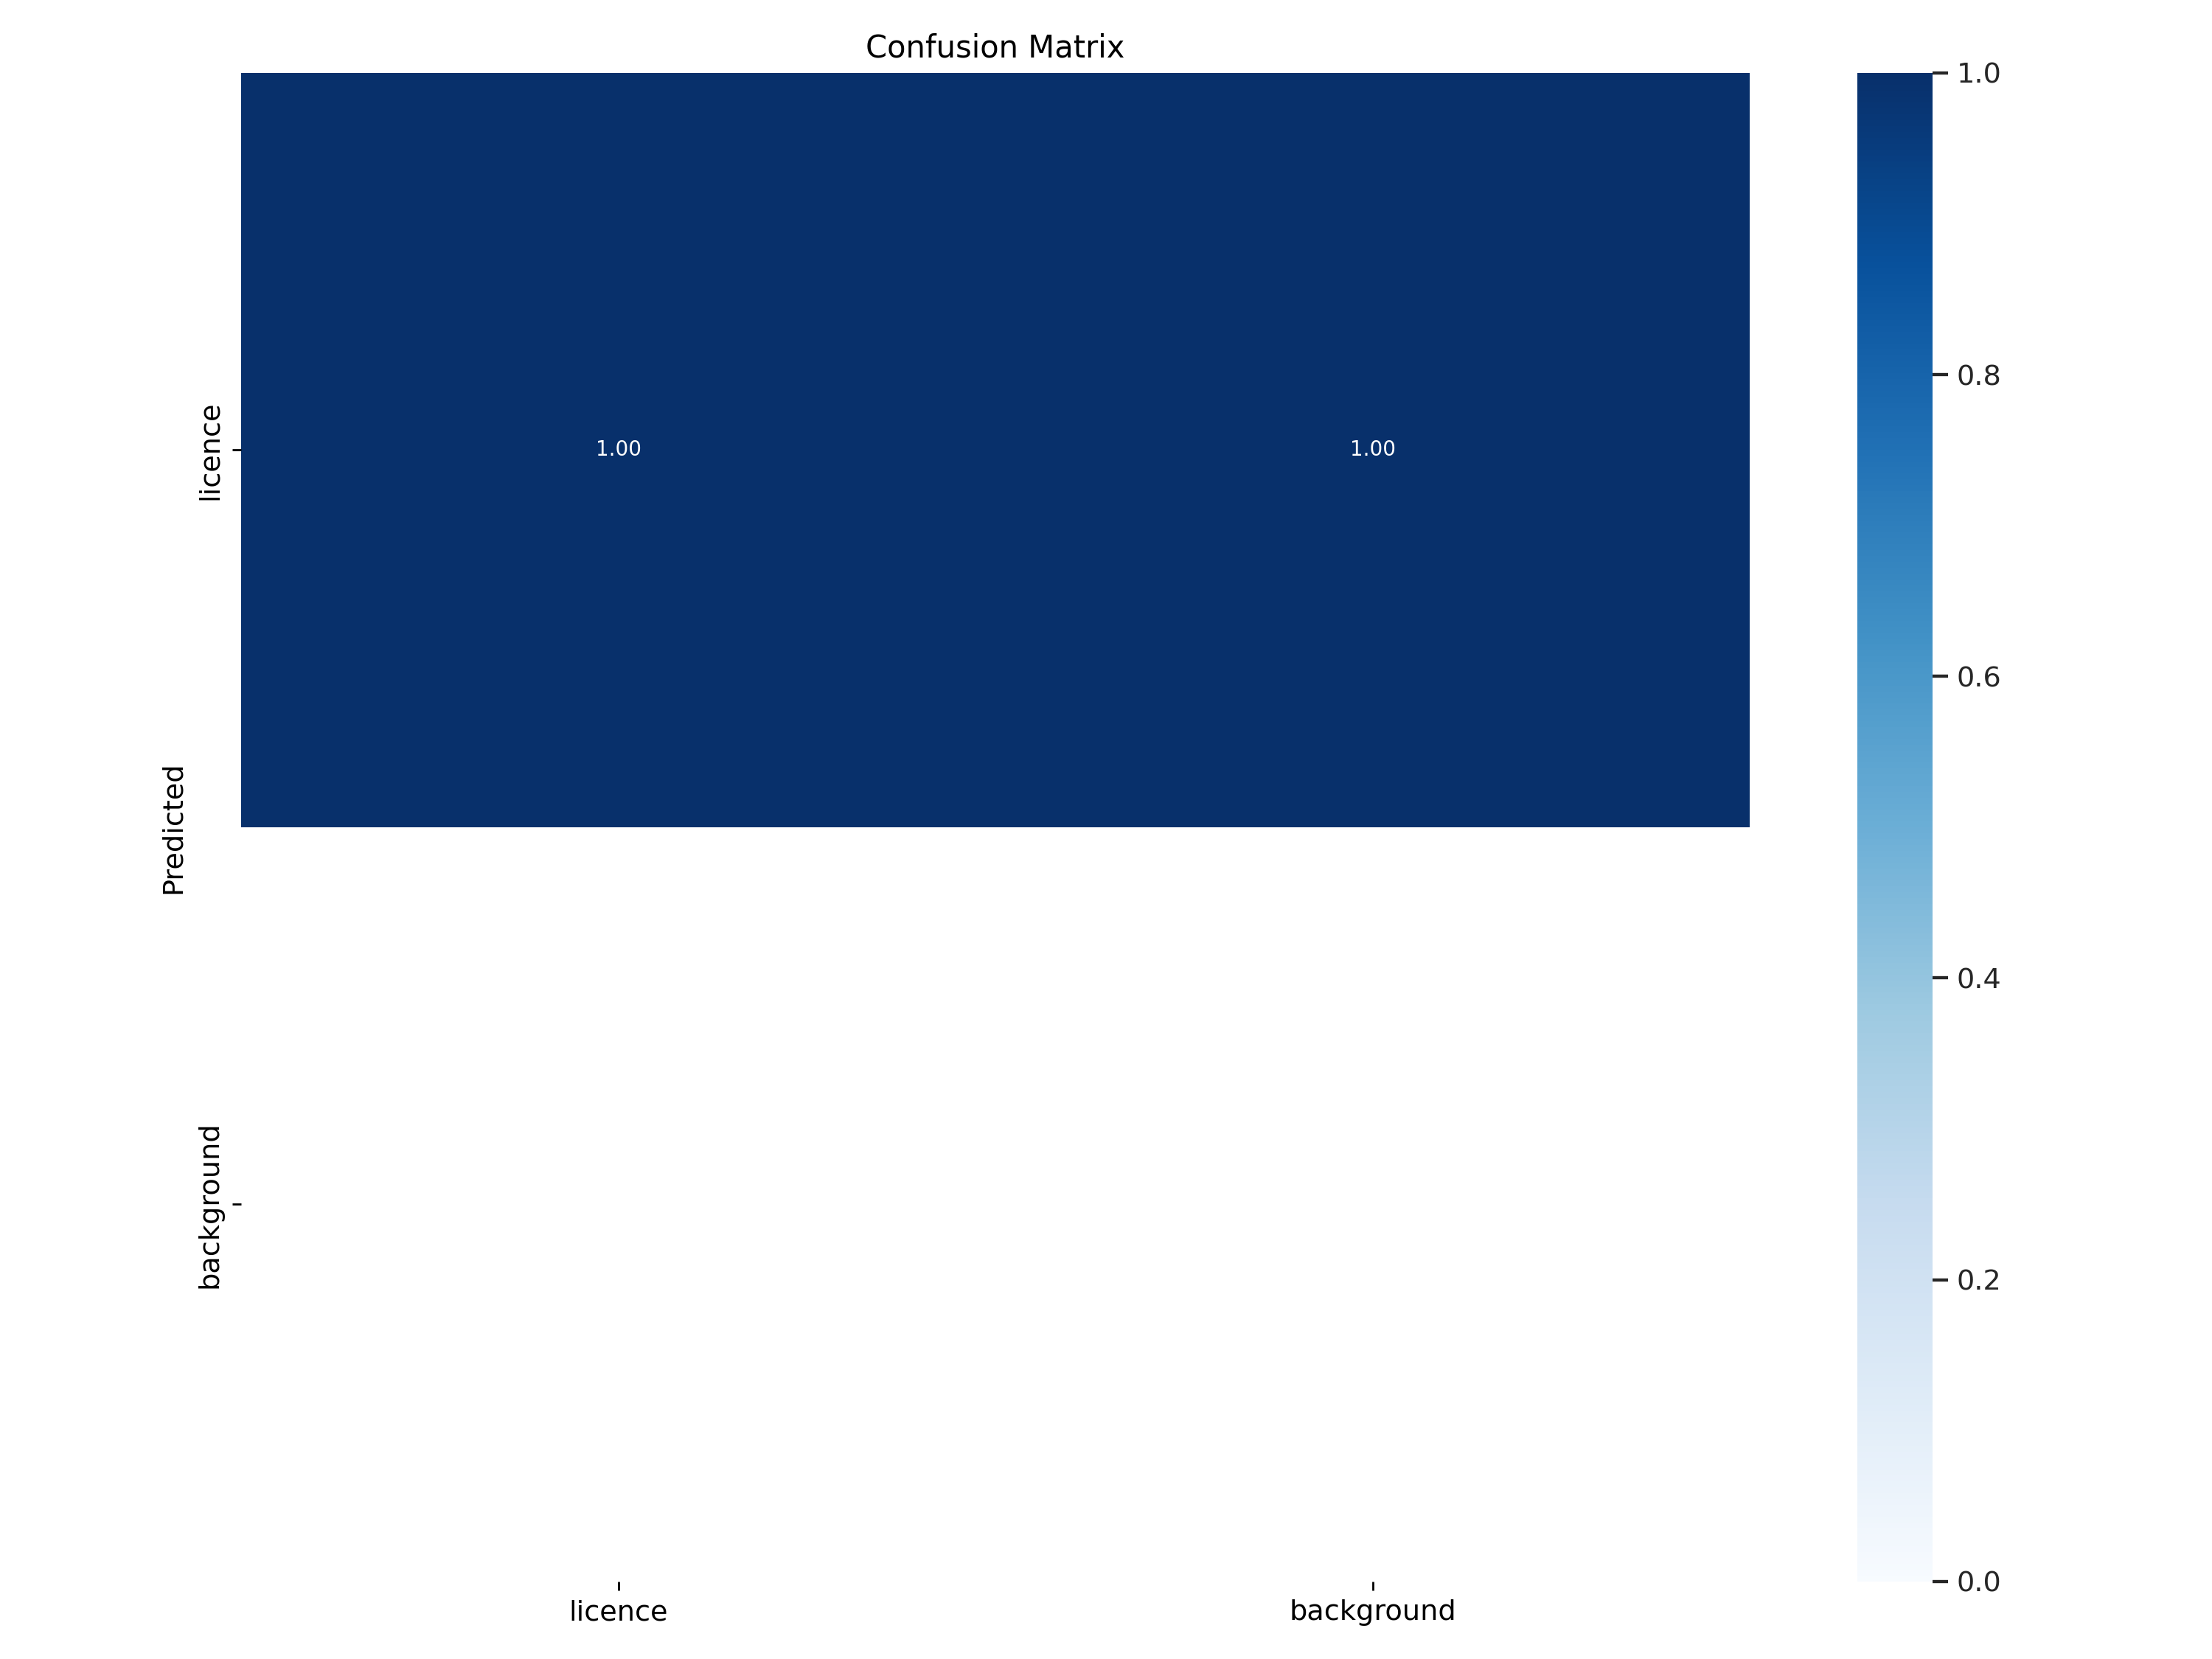

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp4/confusion_matrix.png", width=1000)

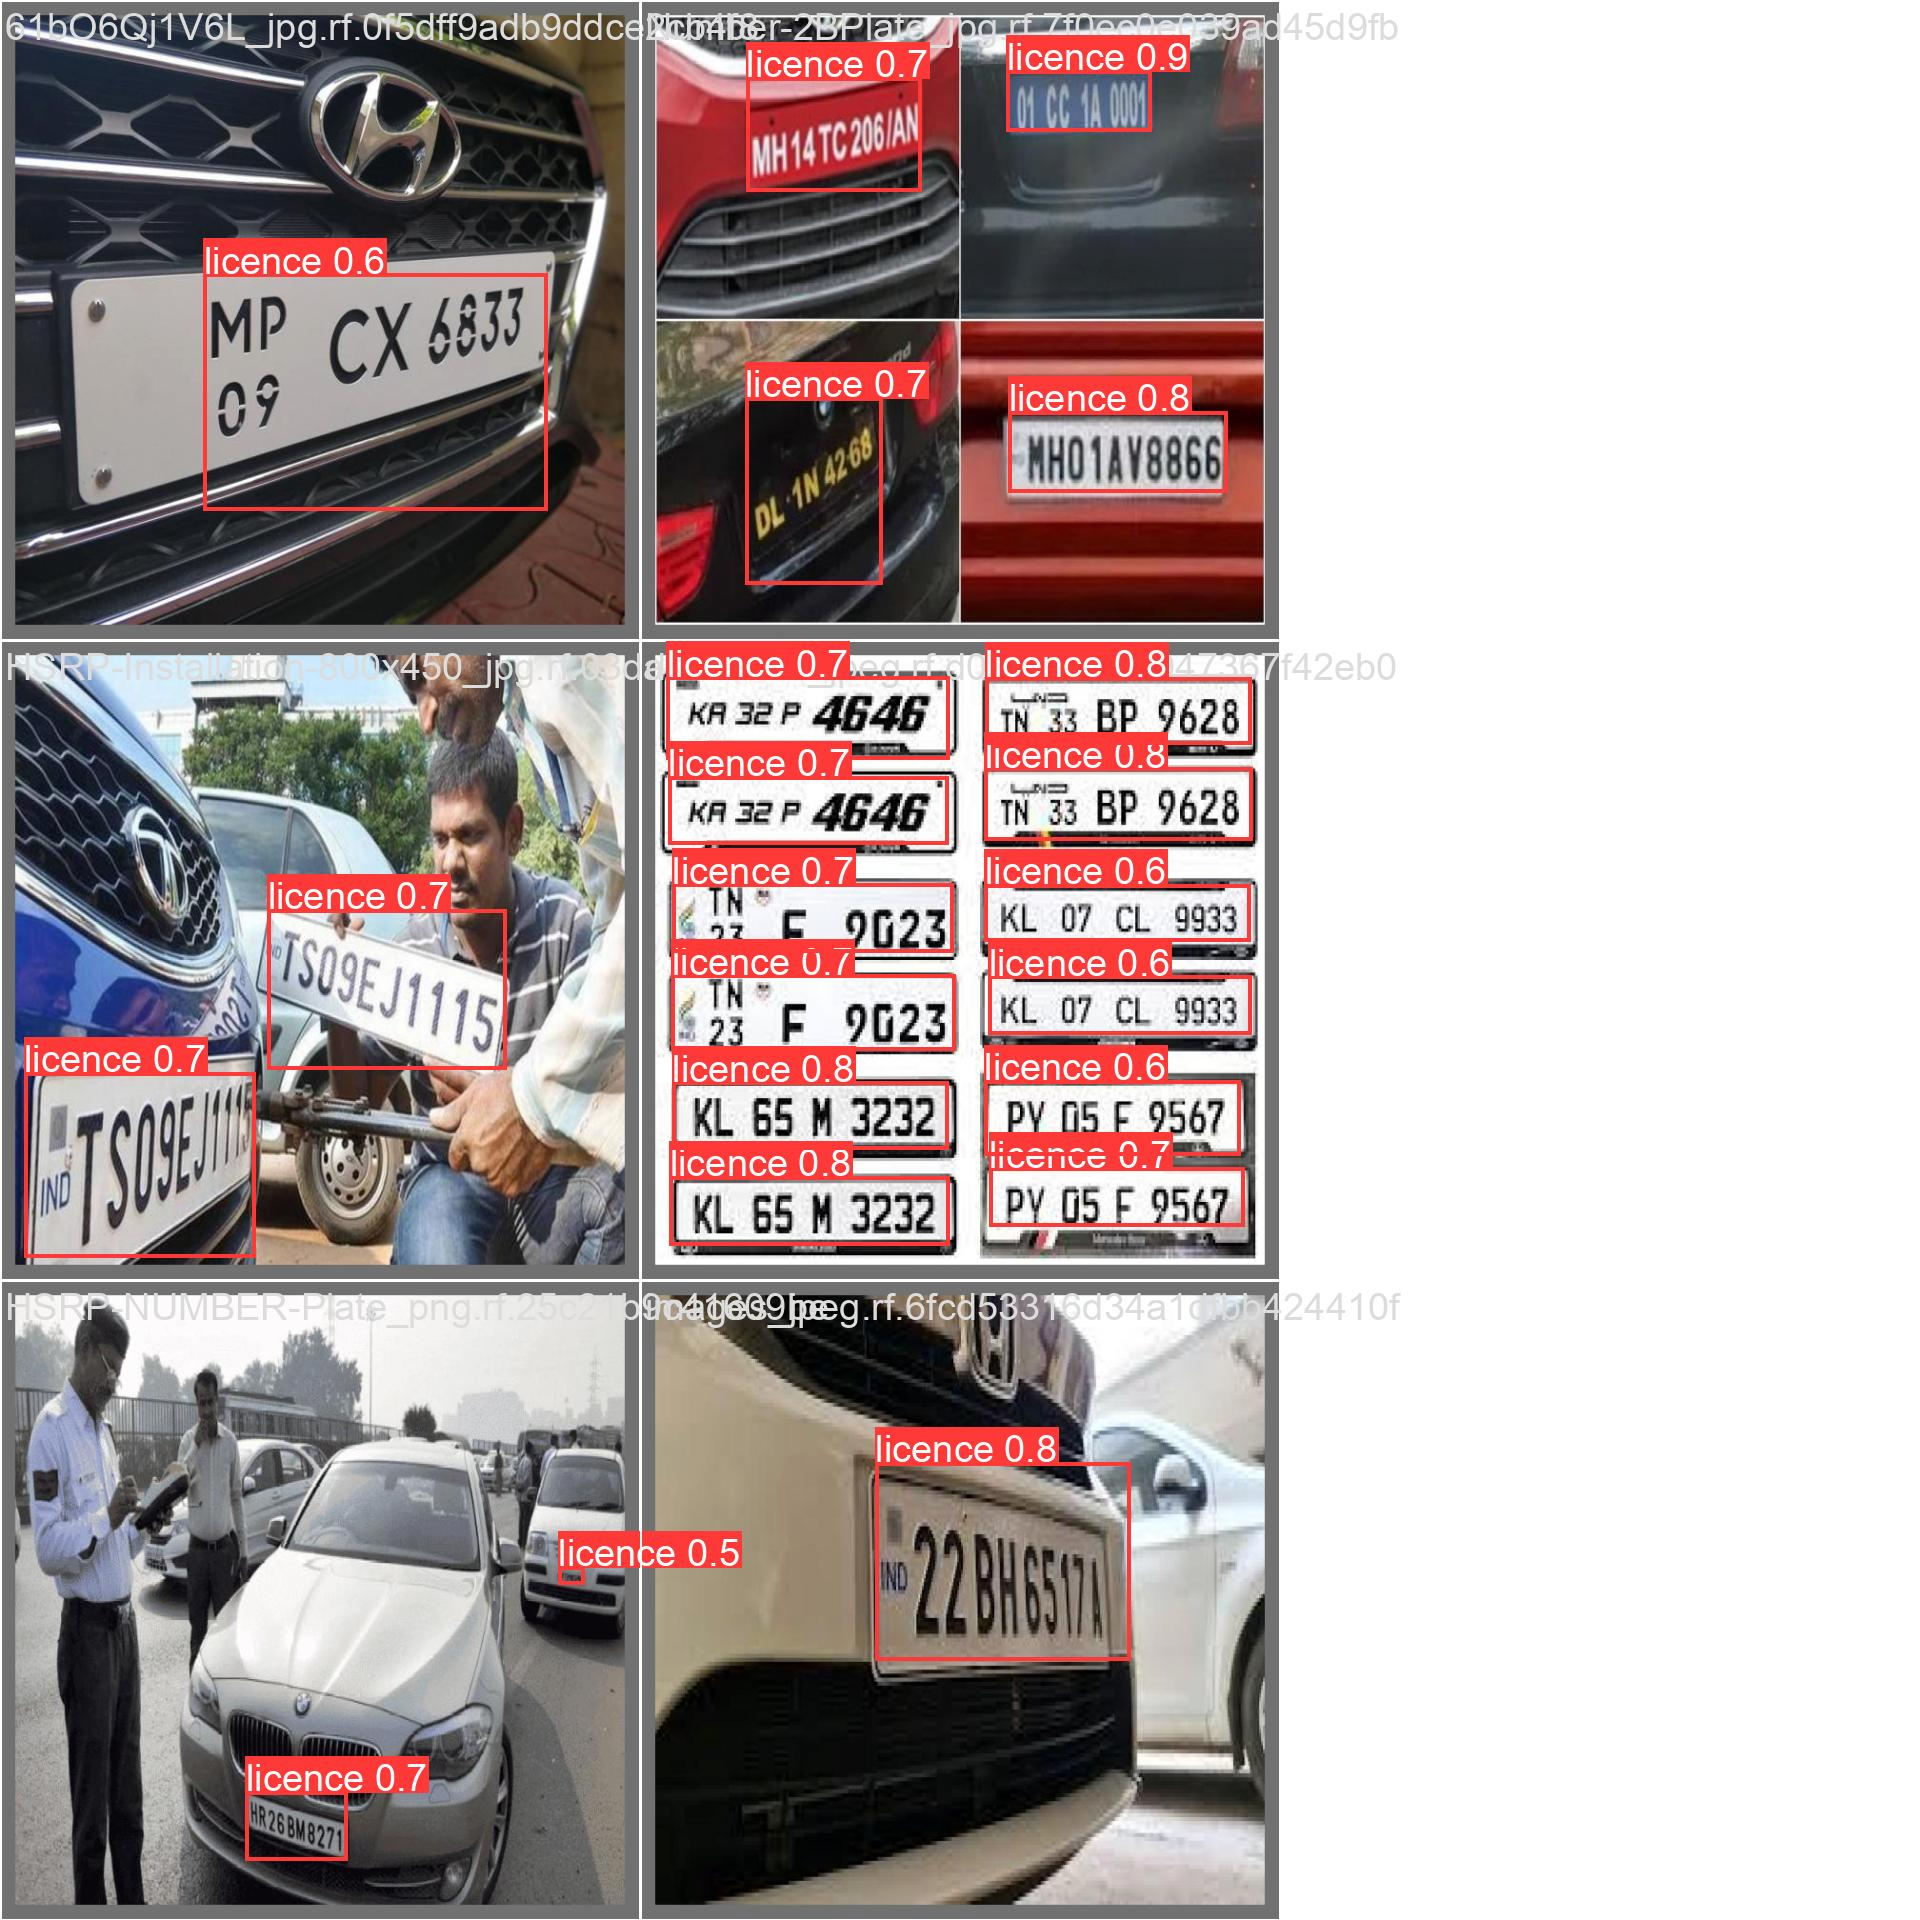

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp4/val_batch0_pred.jpg", width=1000)

In [ ]:
%cd {HOME}/yolov9
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt

/content/drive/MyDrive/yolo/yolov9
val: data=/content/drive/MyDrive/yolo/yolov9/ANPR2-8/data.yaml, weights=['/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default va

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/yolo/yolov9/ANPR2-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#u

In [ ]:
#Test on single image
#!python detect.py \
#--img 1280 --conf 0.1 --device 0 \
#--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
#--source /content/yolov9/car.png

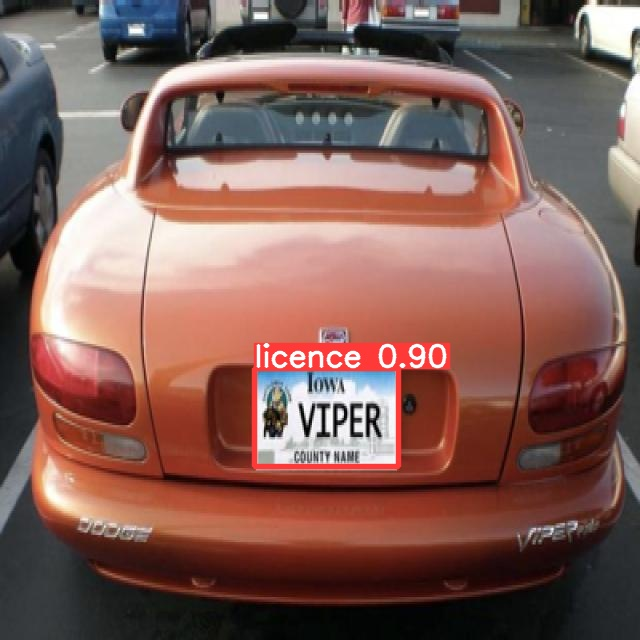

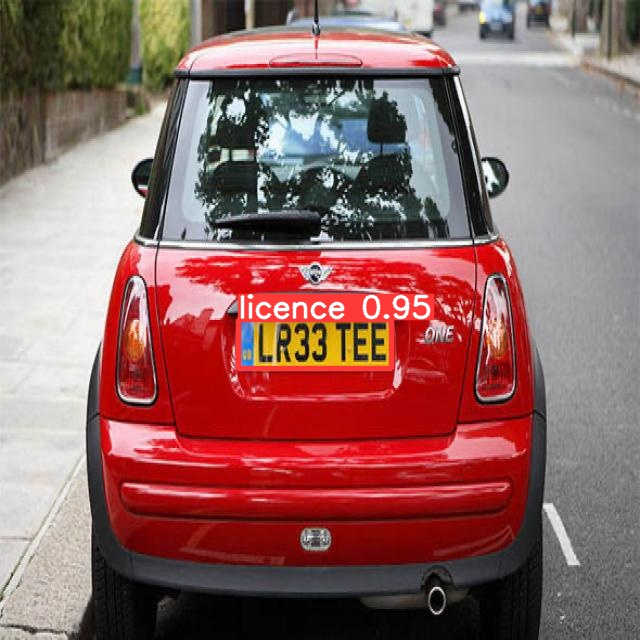

In [ ]:

import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [ ]:
# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source /content/drive/MyDrive/yolo/yolov9/real_test_data/demo.mp4

detect: weights=['/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/yolo/yolov9/real_test_data/demo.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md

In [ ]:
# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source /content/drive/MyDrive/yolo/yolov9/real_test_data/car.png

detect: weights=['/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/yolo/yolov9/real_test_data/car.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [ ]:
HOME+'/yolov9/runs/train/exp4/weights/best.pt'

'/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'

In [ ]:

# video

!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source /content/drive/MyDrive/yolo/yolov9/real_test_data/car.png


anpr: weights=['/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/yolo/yolov9/real_test_data/car.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#un

In [ ]:
#import sys
#sys.path.append('/content/drive/MyDrive/yolo/yolov9/')

from anpr import run
run(weights = HOME+'/yolov9/runs/train/exp4/weights/best.pt', source='/content/drive/MyDrive/yolo/yolov9/real_test_data/car.png')


ModuleNotFoundError: No module named 'anpr'

# ----------- INFERENCE -----------------

## **Inference using script**

In [ ]:
!pip install torch==2.5.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr
!pip install pytesseract
!pip install streamlit
!pip install pyngrok
!pip install "Pillow<10.0"

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.4/838.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1

In [ ]:
#!pip install "Pillow<10.0"
HOME = "/content/drive/MyDrive/yolo/"
%cd /content/drive/MyDrive/yolo/yolov9/
from anpr import run
run(weights = HOME+'/yolov9/runs/train/exp4/weights/best.pt', name = 'cool',source='/content/drive/MyDrive/yolo/yolov9/real_test_data/test_2.mp4')


/content/drive/MyDrive/yolo/yolov9


YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

 -----,e


AttributeError: 'Annotator' object has no attribute 'font'

In [ ]:
import pytesseract
#!pip install "Pillow<10.0"
HOME = "/content/drive/MyDrive/yolo/"
%cd /content/drive/MyDrive/yolo/yolov9/

/content/drive/MyDrive/yolo/yolov9


In [ ]:
import pytesseract
import argparse
from pathlib import Path
import os
import torch
import cv2

from models.common import DetectMultiBackend
from utils.dataloaders import LoadImages
from utils.general import check_img_size, non_max_suppression, scale_boxes, cv2
from utils.plots import Annotator, colors
from utils.torch_utils import select_device
import easyocr


reader = easyocr.Reader(['en'], gpu=True)


def perform_ocr_on_image(img, coordinates):
    x1, y1, x2, y2 = map(int, coordinates)
    cord = (x1,y1,x2,y2)
    cropped_img = img[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)
    _, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    results = reader.readtext(gray)
    for res in results:
        if len(results) == 1 or (len(res[1]) > 6 and res[2] > 0.2):
            return res[1] , cord
    return "" , cord


def perform_ocr_on_imagesss(img, coordinates):
    x1, y1, x2, y2 = map(int, coordinates)
    cord = (x1, y1, x2, y2)
    cropped_img = img[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)

    # Optional: thresholding to improve accuracy
    # _, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    text = pytesseract.image_to_string(gray, config='--psm 7')  # Assume a single block of text
    text = text.strip()

    if len(text) > 6:  # Optional condition to filter
        return text, cord
    return "", cord



def run(weights, input_path, output_dir):
    input_path = str(input_path)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    device = select_device('')
    model = DetectMultiBackend(weights, device=device)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size((640, 640), s=stride)

    dataset = LoadImages(input_path, img_size=imgsz, stride=stride, auto=pt)
    model.warmup(imgsz=(1, 3, *imgsz))
    total_frames = int(dataset.cap.get(cv2.CAP_PROP_FRAME_COUNT)) if dataset.cap else 1

    vid_writer, vid_path = None, None
    fr = 0
    for path, im, im0s, vid_cap, _ in dataset:
        print(f"Processing frame {fr+1}/{total_frames}")

        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()
        im /= 255
        if im.ndim == 3:
            im = im[None]

        pred = model(im)
        pred = non_max_suppression(pred[0], conf_thres=0.25, iou_thres=0.45)

        for det in pred:
            im0 = im0s.copy()
            annotator = Annotator(im0, line_width=2, example=str(names))
            if len(det):
                det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()
                for *xyxy, conf, cls in reversed(det):
                    text , cord = perform_ocr_on_image(im0, xyxy)
                    print('Found Text---',text)
                    label = text if text else f"{names[int(cls)]} {conf:.2f}"
                    annotator.box_label(xyxy, label, color=colors(int(cls), True))
                    #annotator.box_label(xyxy, label, color=(0, 255, 0))

            ext = Path(path).suffix.lower()
            if ext in ['.mp4', '.avi', '.mov', '.mkv'] and vid_cap:
                if vid_path != path:
                    if vid_writer:
                        vid_writer.release()
                    save_path = output_dir / Path(path).name
                    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                    fps = vid_cap.get(cv2.CAP_PROP_FPS)
                    w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                    h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                    vid_writer = cv2.VideoWriter(str(save_path), fourcc, fps, (w, h))
                    vid_path = path
                vid_writer.write(annotator.result())
            else:
                save_path = output_dir / Path(path).name
                cv2.imwrite(str(save_path), annotator.result())
                print(f"Saved: {save_path}")
        fr += 1

    print('Found Text---',text)
    print('Bounding box ----',cord)
    if vid_writer:
        vid_writer.release()



weights = '/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'
#input_path = '/content/drive/MyDrive/yolo/yolov9/real_test_data/car.png'
input_path = "/content/drive/MyDrive/yolo/yolov9/real_test_data/test.jpg"
#input_path = "/content/drive/MyDrive/yolo/yolov9/real_test_data/test_2.mp4"
#input_path = "/content/drive/MyDrive/yolo/yolov9/real_test_data/demo.mp4"
output_dir = '/content/drive/MyDrive/yolo/yolov9/real_test_data_output'

run(weights, input_path, output_dir)


YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.5.0+cu118 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients


Processing frame 1/1
Found Text--- UP93BRO 109
Found Text--- UP320D2339
Found Text--- UP320S3939
Found Text--- UP7 OFRO 426
Saved: /content/drive/MyDrive/yolo/yolov9/real_test_data_output/test.jpg
Found Text--- UP7 OFRO 426
Bounding box ---- (1523, 1538, 1776, 1605)


## **Inference using screamlit app**

In [ ]:
!pip install torch==2.5.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr
!pip install pytesseract
!pip install streamlit
!pip install pyngrok
!pip install "Pillow<10.0"

Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2x2RADS9eerAiJYSK1DalsWOelc_4YPptiJxhV7tyRRvviZYh
HOME = "/content/drive/MyDrive/yolo/"
%cd /content/drive/MyDrive/yolo/yolov9/

In [ ]:
%%writefile app.py

import streamlit as st
import tempfile
import os
import time
from pathlib import Path
import cv2
import torch
import numpy as np
from PIL import Image

from models.common import DetectMultiBackend
from utils.dataloaders import LoadImages
from utils.general import check_img_size, non_max_suppression, scale_boxes, cv2
from utils.plots import Annotator, colors
from utils.torch_utils import select_device
import easyocr
import pytesseract

# Constants
SAVE_DIR = "/content/drive/MyDrive/yolo/yolov9/real_test_data_output"
Path(SAVE_DIR).mkdir(parents=True, exist_ok=True)

# Initialize OCR engines
easyocr_reader = easyocr.Reader(['en'], gpu=True)


# --- OCR Preprocessing Function ---
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)  # reduce noise
    gray = cv2.equalizeHist(gray)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh


# --- OCR Function using either easyocr or pytesseract ---
def perform_ocr_on_image(img, coordinates, engine='pytesseract'):
    x1, y1, x2, y2 = map(int, coordinates)
    cropped_img = img[y1:y2, x1:x2]
    #preprocessed = preprocess_image(cropped_img)
    preprocessed = cropped_img
    if engine == 'easyocr':
        results = easyocr_reader.readtext(preprocessed)
        for res in results:
            if len(results) == 1 or (len(res[1]) > 6 and res[2] > 0.2):
                return res[1], (x1, y1, x2, y2)
        return "", (x1, y1, x2, y2)
    else:
        config = "--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
        text = pytesseract.image_to_string(preprocessed, config=config)
        return text.strip(), (x1, y1, x2, y2)


# --- Main Inference Pipeline ---
def run(weights_path, input_path, original_filename, is_video=False, ocr_engine='pytesseract',
        progress_callback=None, text_callback=None):

    output_dir = Path(SAVE_DIR)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Output filename
    stem = Path(original_filename).stem
    ext = Path(original_filename).suffix
    output_filename = f"{stem}_predicted{ext}" if is_video else f"{stem}_predicted.jpg"
    save_path = output_dir / output_filename

    # Load model
    device = select_device('')
    model = DetectMultiBackend(weights_path, device=device)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size((640, 640), s=stride)
    dataset = LoadImages(input_path, img_size=imgsz, stride=stride, auto=pt)
    model.warmup(imgsz=(1, 3, *imgsz))

    total_frames = int(dataset.cap.get(cv2.CAP_PROP_FRAME_COUNT)) if dataset.cap else 1
    results_list = []
    fr = 0
    vid_writer = None
    vid_path = None

    for path, im, im0s, vid_cap, _ in dataset:
        fr += 1
        if progress_callback:
            progress_callback(fr / total_frames)
        if text_callback:
            text_callback(f"Processing frame {fr}/{total_frames}")

        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()
        im /= 255.0
        if im.ndim == 3:
            im = im[None]

        pred = model(im)
        pred = non_max_suppression(pred[0], conf_thres=0.25, iou_thres=0.45)

        im0 = im0s.copy()
        annotator = Annotator(im0, line_width=2, example=str(names))

        for det in pred:
            if len(det):
                det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()
                for *xyxy, conf, cls in reversed(det):
                    text, cord = perform_ocr_on_image(im0, xyxy, engine=ocr_engine)
                    label = text if text else f"{names[int(cls)]} {conf:.2f}"
                    annotator.box_label(xyxy, label, color=colors(int(cls), True))
                    results_list.append((label, cord))

        ext = Path(path).suffix.lower()
        if is_video and vid_cap:
            if vid_path != path:
                if vid_writer:
                    vid_writer.release()
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                fps = vid_cap.get(cv2.CAP_PROP_FPS)
                w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                vid_writer = cv2.VideoWriter(str(save_path), fourcc, fps, (w, h))
                vid_path = path
            vid_writer.write(annotator.result())
        else:
            cv2.imwrite(str(save_path), annotator.result())
            return annotator.result(), results_list, str(save_path)

    if vid_writer:
        vid_writer.release()
        return None, results_list, str(save_path)

    return None, results_list, None


# ---------------- Streamlit UI ----------------
st.title("Number Plate Detection and Recognition")
st.write("Upload an image or video to detect number plates using YOLOv9 and extract text using OCR.")

uploaded_file = st.file_uploader("Upload Image or Video", type=["jpg", "jpeg", "png", "mp4", "avi", "mov", "mkv"])
ocr_engine = st.selectbox("Choose OCR Engine", ["pytesseract", "easyocr"])

if uploaded_file:
    is_video = uploaded_file.type.startswith("video")

    with tempfile.NamedTemporaryFile(delete=False, suffix=Path(uploaded_file.name).suffix) as temp_file:
        temp_file.write(uploaded_file.read())
        input_path = temp_file.name

    weights_path = '/content/drive/MyDrive/yolo/yolov9/runs/train/exp4/weights/best.pt'

    progress_bar = st.progress(0)
    progress_text = st.empty()
    st.info(" Processing...")

    start_time = time.time()
    output_img, results, output_path = run(
        weights_path, input_path,
        original_filename=uploaded_file.name,
        is_video=is_video,
        ocr_engine=ocr_engine,
        progress_callback=progress_bar.progress,
        text_callback=progress_text.text
    )
    end_time = time.time()

    st.success(f"Processing completed in {end_time - start_time:.2f} seconds.")
    progress_bar.empty()
    progress_text.empty()

    st.markdown(f"** Saved output file:** `{output_path}`")

    if is_video and output_path:
        st.video(output_path)
    elif output_img is not None:
        st.image(output_img, caption="Processed Image", channels="BGR")
        st.subheader(" Detected Texts:")
        for text, bbox in results:
            st.write(f"**{text}** at {bbox}")
    else:
        st.warning("No results found.")


Overwriting app.py


In [ ]:
Token = "2x2RADS9eerAiJYSK1DalsWOelc_4YPptiJxhV7tyRRvviZYh"

from pyngrok import ngrok
import os
import time

# Kill any existing Streamlit processes
os.system("pkill streamlit")

# Open HTTP tunnel on the default Streamlit port 8501
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app URL: {public_url}")

# Run Streamlit app
os.system("streamlit run app.py &")

# Optional: wait a few seconds for the app to boot
time.sleep(3)


Streamlit app URL: NgrokTunnel: "https://1ddb-34-125-7-219.ngrok-free.app" -> "http://localhost:8501"
